In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Name: David-Benjamin Dy 
## Student ID: 21701586 
## Class: DSCI 100 006, Group 17 

### Question 1: Data Description
**players.csv** has the dimensions 196 x 7, with data describing all players that have been on the server, including their name, age, gender, hours played, experience *(on a ranking of Beginner, Amateur, Regular, Veteran, or Pro)*, whether or not they are subscribed, and the email they made their account with, hashed for the sake of privacy.

**sessions.csv** has the dimensions 1535 x 7, and describes who has been online based on their email, showing what time they logged in and what time they logged out. The data describes the time in 2 different ways; a human-legible method with the data and time, and a E^12 format, which is more easily read by computers.

### Question 2: Questions
Our project will attempt to determine when players of a specific demographic are more likely to be online. That is to say, can the start time and end time predict a player's skill level? 

### Question 3: Exploratory Data Analysis and Visualization
1) Demonstrate that the dataset can be loaded into R.
2) Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
3) Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
4) Make a few exploratory visualizations of the data to help you understand it.
    + Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
    + Explain any insights you gain from these plots that are relevant to address your question

In [13]:
# Loading Players Dataset into R
player_url <- "https://raw.githubusercontent.com/mulch-eater-prime/DSCI-Group-17-Project/refs/heads/main/players%20(1).csv"
player <- read_csv(player_url)
player
# Dataset is already Tidy: no wrangling needed

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [14]:
# Loading Sessions Dataset into R
sessions_url <- "https://raw.githubusercontent.com/mulch-eater-prime/DSCI-Group-17-Project/03abe89c68205649e71bfa9b8a9cf90efe553b24/sessions%20(1).csv"
sessions <- read_csv(sessions_url)
# Need to separate time and date for better tidy data
sessions_2 <- sessions |>
    separate(col = start_time, into = c("start_date", "start_time"), sep = " ") |>
    separate(col = end_time, into = c("end_date", "end_time"), sep = " ")
sessions_2

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,15:36,28/07/2024,15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,06:15,25/07/2024,06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,02:26,20/05/2024,02:45,1.71617e+12,1.71617e+12


In [15]:
# Calculating the mean for players.csv
mean <- player |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm = TRUE)
mean

played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


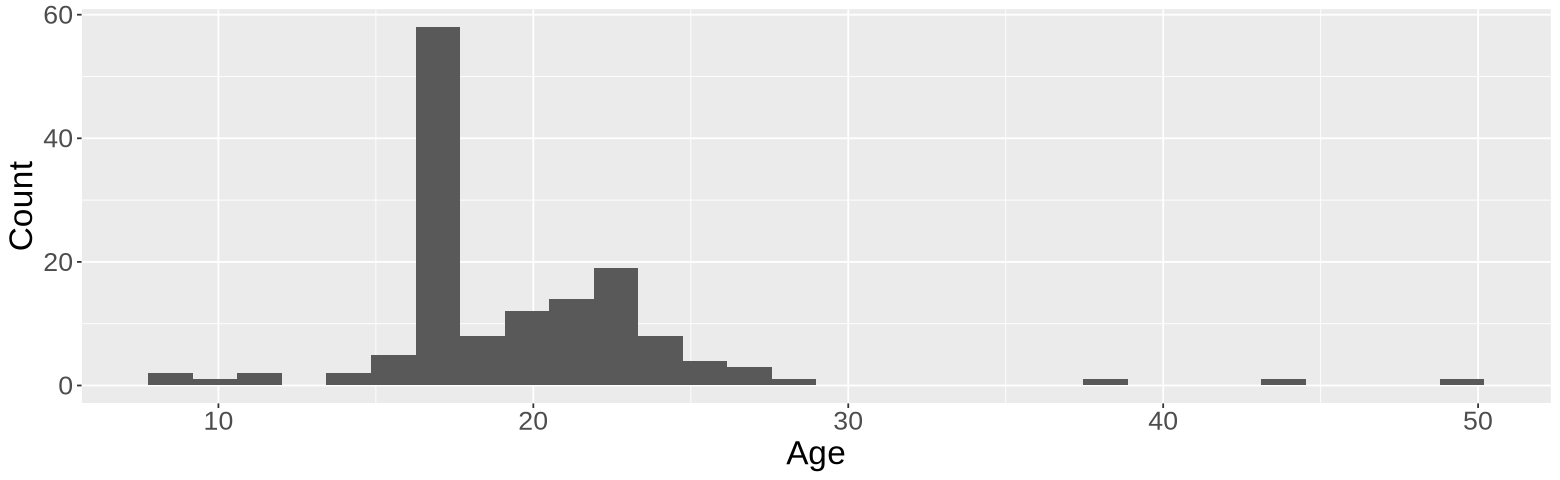

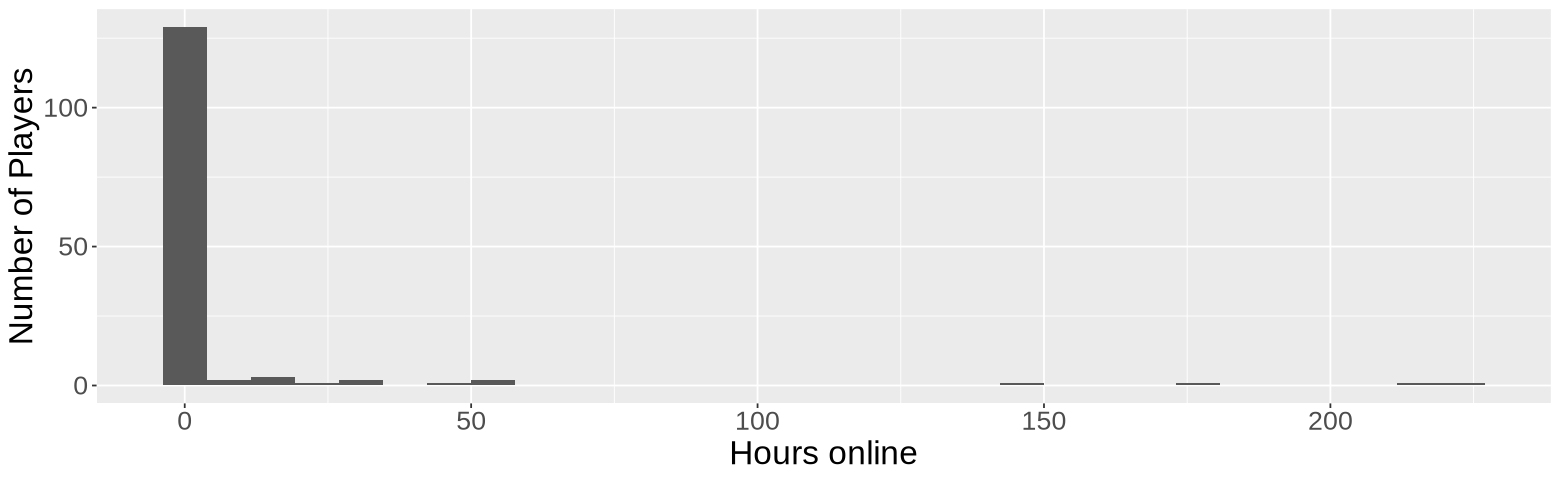

In [16]:
# visualizating data: Age and playtime distributions for subscribers.
options(repr.plot.width = 13, repr.plot.height = 4) 
player_plot <- player |>
    filter(subscribe == "TRUE") |>
    ggplot(aes(x = Age)) +
    geom_histogram() +
    labs(x = "Age", y = "Count") +
    theme(text = element_text(size = 20))
player_plot
hour_plot <- player |>
    filter(subscribe == "TRUE") |>
    ggplot(aes(x = played_hours)) +
    geom_histogram() +
    labs(x = "Hours online", y = "Number of Players") +
    theme(text = element_text(size = 20))
hour_plot

From these graphs, we can see that the a majority of subscribers are approximately 17 years old, with a vast majority of them having less than 1 hour of playtime. There are also some points that are notabe outliers, having more than 100, or even 200 hours of playtime.

### Question 4: Methods and Plan
1) Why is this method appropriate?
2) Which assumptions are required, if any, to apply the method selected?
3) What are the potential limitations or weaknesses of the method selected?
4) How are you going to compare and select the model?
5) How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

For this model, I think that the best way to start would be by organize the data so that the start and end time are written as dbl variables, in terms of how many minutes have passed since midnight. From there, it is much easier to use a nearest neighbour classification model to determine skill level of each player based on the start and end times of each session. It will likely be necessary to combine the 2 data sets to get the session time and skill level into the same dataset. In order to get a high degree of accuracy, we will also need to split the data into a testing a training set after wrangling the data, along with cross validation in order to determine the K-value for the classification. The largest forseeable limitation of the data set is that it does not fully take into account sessions that go past midnight, and it assumes that there is a correlation between session start/end time and skill level.